In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

API_key = 'a89512f773d1c2a5a4fd2b6004973d6b'

countries = ['Jamaica', 'Indonesia', 'United States', "Turkey", 'Saudi Arabia', "Egypt", 'China']

country_name_list = []
maxtemp = []
mintemp = []
humidity = []
windspeed = []

for country_names in countries:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={country_names}&APPID={API_key}&units=metric'
    r = requests.get(url)
    data = r.json()

    if 'name' in data:
        country_name_list.append(data['name'])
        maxtemp.append(data['main']['temp_max'])
        mintemp.append(data['main']['temp_min'])
        humidity.append(data['main']['humidity'])
        windspeed.append(data['wind']['speed'])
    else:
        print(f"Data not found for {country_names}")

df = pd.DataFrame()
df['Names'] = country_name_list
df['Max_Temp'] = maxtemp
df['Min_Temp'] = mintemp
df['Humidity'] = humidity
df['WindSpeed'] = windspeed

df.head()



,Names,Max_Temp,Min_Temp,Humidity,WindSpeed
0,Jamaica,25.76,25.76,70,6.54
1,Indonesia,23.41,23.41,97,1.25
2,United States of America,15.78,15.78,95,4.84
3,Turkey,15.40,15.40,40,4.89
4,Saudi Arabia,30.29,30.29,14,3.44


In [3]:
df.isna().sum()

Names        0
Max_Temp     0
Min_Temp     0
Humidity     0
WindSpeed    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Max_Temp,Min_Temp,Humidity,WindSpeed
count,7.000000,7.000000,7.000000,7.000000
mean,20.301429,19.912857,65.857143,4.125714
std,7.893448,8.678398,29.706501,2.138176
min,7.120000,4.400000,14.000000,1.250000
25%,15.590000,15.590000,55.000000,2.490000
50%,23.410000,23.410000,70.000000,4.840000
75%,25.055000,25.055000,85.000000,5.635000
max,30.290000,30.290000,97.000000,6.540000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Names      7 non-null      object 
 1   Max_Temp   7 non-null      float64
 2   Min_Temp   7 non-null      float64
 3   Humidity   7 non-null      int64  
 4   WindSpeed  7 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 412.0+ bytes


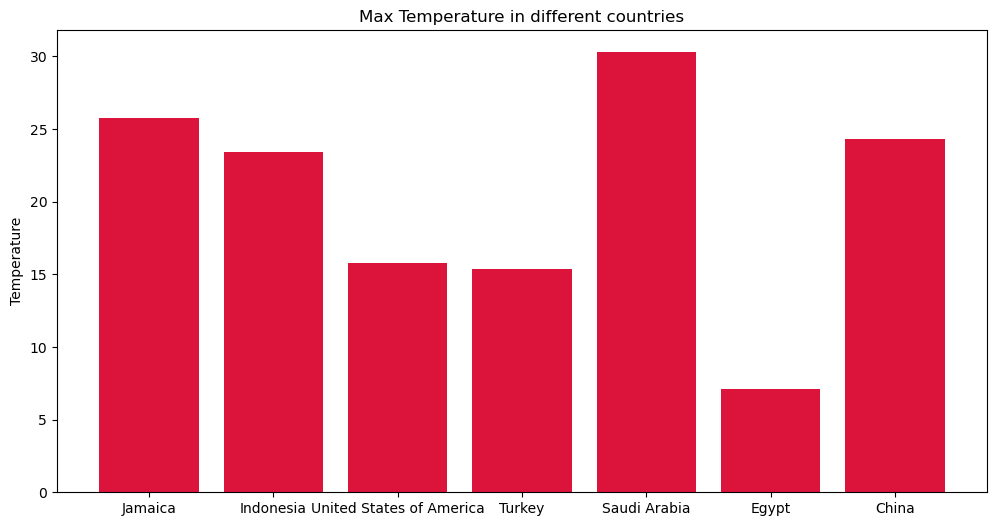

In [11]:
plt.figure(figsize=(12,6))
plt.bar(df['Names'], df['Max_Temp'], color='crimson')
plt.title("Max Temperature in different countries")
plt.ylabel("Temperature")
plt.show()

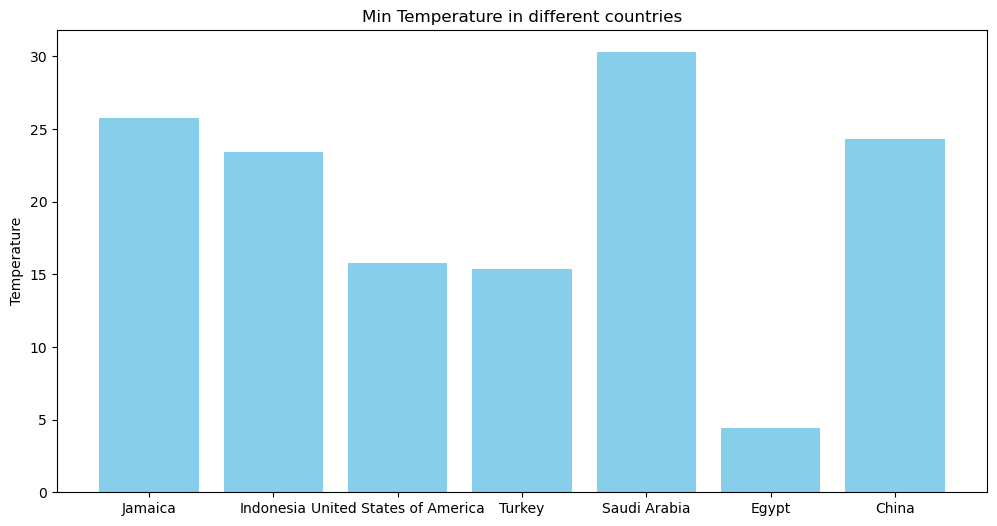

In [13]:
plt.figure(figsize=(12,6))
plt.bar(df['Names'], df['Min_Temp'], color='skyblue')
plt.title("Min Temperature in different countries")
plt.ylabel("Temperature")
plt.show()

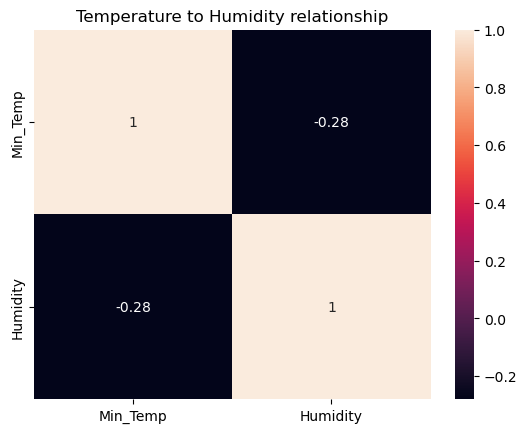

In [15]:
corre = df[['Min_Temp','Humidity']].corr()
sns.heatmap(corre, annot=True)
plt.title("Temperature to Humidity relationship")
plt.show()